In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Paths
file_path = '/content/drive/Shareddrives/STA_160/dataset/Data_Entry_2017.csv'

# Data_Entry_2017.csv
df = pd.read_csv(file_path)

df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [ ]:

# column names
df.columns

# Frequency of disease type before splitting multi-labels
pd.set_option("display.max_rows", None)
df["Finding Labels"].value_counts(dropna=False)

,count
Finding Labels,
No Finding,60361
Infiltration,9547
Atelectasis,4215
Effusion,3955
Nodule,2705
Pneumothorax,2194
Mass,2139
Effusion|Infiltration,1603
Atelectasis|Infiltration,1350


In [ ]:
# Frequency of x-rays with only a single label before splitting multi-labels
df["Finding Labels"].value_counts(dropna=False)[['Cardiomegaly', 'Emphysema', 'Effusion', 'No Finding', 'Hernia',
       'Infiltration', 'Mass', 'Nodule', 'Atelectasis', 'Pneumothorax',
       'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema',
       'Consolidation']].sort_values(ascending=False)

,count
Finding Labels,
No Finding,60361
Infiltration,9547
Atelectasis,4215
Effusion,3955
Nodule,2705
Pneumothorax,2194
Mass,2139
Consolidation,1310
Pleural_Thickening,1126


In [ ]:

# Splitting the multi-labels in "Finding Labels" into their own row

## make copy
df_split = df.copy()

## split multi-label values into their own string
df_split["Finding Labels"] = df_split["Finding Labels"].str.split("|")

## splits multi-label values into their own row
df_split = df_split.explode("Finding Labels")

# Frequency of disease type after splitting multi-labels
counts = df_split.value_counts("Finding Labels")
print(counts)

Finding Labels
No Finding            60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
Name: count, dtype: int64


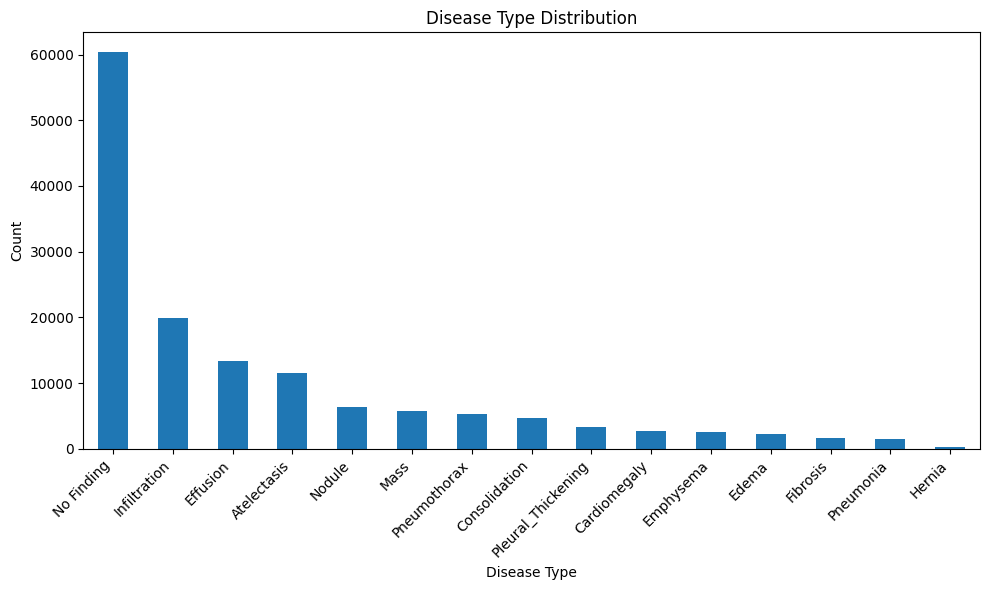

In [ ]:
# Bar graph of disease frequency after splitting multi-labels

plt.figure(figsize=(10,6))

counts.plot(kind = "bar")

plt.title("Disease Type Distribution")
plt.ylabel("Count")
plt.xlabel("Disease Type")
plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.show()

In [ ]:
# Age Distribution data

df_split.groupby('Finding Labels')['Patient Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Finding Labels,,,,,,,,
Atelectasis,11559.0,50.495458,15.777830,2.0,41.00,53.0,62.0,154.0
Cardiomegaly,2776.0,47.268012,17.244470,2.0,34.00,49.0,60.0,91.0
Consolidation,4667.0,46.654810,17.321961,2.0,33.00,49.0,59.0,93.0
Edema,2303.0,45.578810,17.632032,3.0,33.00,47.0,58.0,414.0
Effusion,13317.0,49.771195,16.543833,1.0,38.00,52.0,61.0,412.0
Emphysema,2516.0,50.324324,17.350479,10.0,37.00,54.0,63.0,88.0
Fibrosis,1686.0,52.706999,15.084279,5.0,44.00,53.0,64.0,93.0
Hernia,227.0,63.211454,13.353573,16.0,54.00,62.0,73.5,88.0
Infiltration,19894.0,46.200814,17.073709,1.0,33.00,48.0,59.0,153.0


<Figure size 1000x600 with 0 Axes>

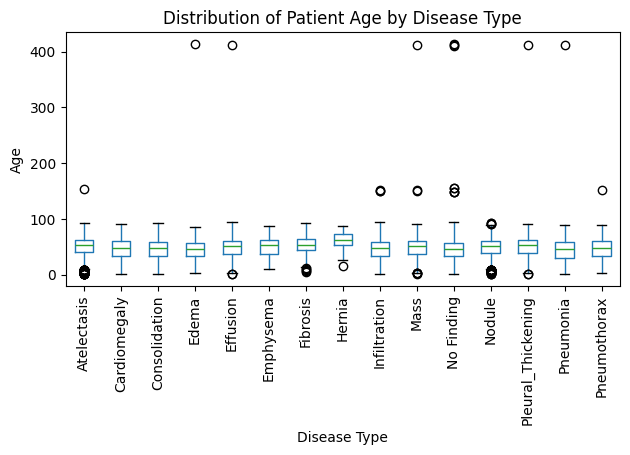

In [ ]:

# Boxplot of distribution of ages by disease type

plt.figure(figsize=(10,6))

df_split.boxplot(column="Patient Age", by = "Finding Labels", rot = 90, grid = False)

plt.title("Distribution of Patient Age by Disease Type")
plt.suptitle("")
plt.ylabel("Age")
plt.xlabel("Disease Type")
plt.tight_layout()
plt.show()

In [ ]:

# checking top 10 rows with the highest patient ages in the split multi-labels dataset

df_split.nlargest(10, "Patient Age")

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
46965,00011973_002.png,Edema,2,11973,414,M,AP,3056,2544,0.139,0.139,NaN
86264,00021275_003.png,No Finding,3,21275,413,F,AP,3056,2544,0.139,0.139,NaN
20852,00005567_000.png,Effusion,0,5567,412,M,AP,3056,2544,0.139,0.139,NaN
20852,00005567_000.png,Pneumonia,0,5567,412,M,AP,3056,2544,0.139,0.139,NaN
85404,00021047_002.png,Mass,2,21047,412,M,AP,3056,2544,0.139,0.139,NaN
85404,00021047_002.png,Pleural_Thickening,2,21047,412,M,AP,3056,2544,0.139,0.139,NaN
91369,00022811_000.png,No Finding,0,22811,412,M,PA,3056,2544,0.139,0.139,NaN
84810,00020900_002.png,No Finding,2,20900,411,M,AP,3056,2544,0.139,0.139,NaN
101194,00026871_000.png,No Finding,0,26871,155,F,PA,2992,2991,0.143,0.143,NaN
104590,00027989_000.png,No Finding,0,27989,155,M,PA,2992,2991,0.143,0.143,NaN


In [ ]:

# checking top 10 rows with the highest patient ages in the original dataset

df.nlargest(10, "Patient Age")

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
46965,00011973_002.png,Edema,2,11973,414,M,AP,3056,2544,0.139,0.139,NaN
86264,00021275_003.png,No Finding,3,21275,413,F,AP,3056,2544,0.139,0.139,NaN
20852,00005567_000.png,Effusion|Pneumonia,0,5567,412,M,AP,3056,2544,0.139,0.139,NaN
85404,00021047_002.png,Mass|Pleural_Thickening,2,21047,412,M,AP,3056,2544,0.139,0.139,NaN
91369,00022811_000.png,No Finding,0,22811,412,M,PA,3056,2544,0.139,0.139,NaN
84810,00020900_002.png,No Finding,2,20900,411,M,AP,3056,2544,0.139,0.139,NaN
101194,00026871_000.png,No Finding,0,26871,155,F,PA,2992,2991,0.143,0.143,NaN
104590,00027989_000.png,No Finding,0,27989,155,M,PA,2992,2991,0.143,0.143,NaN
98495,00026028_001.png,Atelectasis,1,26028,154,M,PA,2992,2991,0.143,0.143,NaN
95794,00025206_000.png,Infiltration|Mass,0,25206,153,M,PA,2992,2991,0.143,0.143,NaN


In [ ]:

# Patients from that are 100 yo and above from the og data set

df[df["Patient Age"] >= 100].sort_values("Patient Age", ascending = False)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
46965,00011973_002.png,Edema,2,11973,414,M,AP,3056,2544,0.139,0.139,NaN
86264,00021275_003.png,No Finding,3,21275,413,F,AP,3056,2544,0.139,0.139,NaN
85404,00021047_002.png,Mass|Pleural_Thickening,2,21047,412,M,AP,3056,2544,0.139,0.139,NaN
20852,00005567_000.png,Effusion|Pneumonia,0,5567,412,M,AP,3056,2544,0.139,0.139,NaN
91369,00022811_000.png,No Finding,0,22811,412,M,PA,3056,2544,0.139,0.139,NaN
84810,00020900_002.png,No Finding,2,20900,411,M,AP,3056,2544,0.139,0.139,NaN
101194,00026871_000.png,No Finding,0,26871,155,F,PA,2992,2991,0.143,0.143,NaN
104590,00027989_000.png,No Finding,0,27989,155,M,PA,2992,2991,0.143,0.143,NaN
98495,00026028_001.png,Atelectasis,1,26028,154,M,PA,2992,2991,0.143,0.143,NaN
95794,00025206_000.png,Infiltration|Mass,0,25206,153,M,PA,2992,2991,0.143,0.143,NaN


In [ ]:

# Patients from that are 100 yo and above from the split data set

df_split[df_split["Patient Age"] >= 100].sort_values("Patient Age", ascending = False)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
46965,00011973_002.png,Edema,2,11973,414,M,AP,3056,2544,0.139,0.139,NaN
86264,00021275_003.png,No Finding,3,21275,413,F,AP,3056,2544,0.139,0.139,NaN
20852,00005567_000.png,Pneumonia,0,5567,412,M,AP,3056,2544,0.139,0.139,NaN
20852,00005567_000.png,Effusion,0,5567,412,M,AP,3056,2544,0.139,0.139,NaN
85404,00021047_002.png,Pleural_Thickening,2,21047,412,M,AP,3056,2544,0.139,0.139,NaN
85404,00021047_002.png,Mass,2,21047,412,M,AP,3056,2544,0.139,0.139,NaN
91369,00022811_000.png,No Finding,0,22811,412,M,PA,3056,2544,0.139,0.139,NaN
84810,00020900_002.png,No Finding,2,20900,411,M,AP,3056,2544,0.139,0.139,NaN
101194,00026871_000.png,No Finding,0,26871,155,F,PA,2992,2991,0.143,0.143,NaN
104590,00027989_000.png,No Finding,0,27989,155,M,PA,2992,2991,0.143,0.143,NaN


In [ ]:
# Removing outlier patients of older age

df_no_old = df_split[df_split["Patient Age"] <= 100]

df_no_old.groupby('Finding Labels')['Patient Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Finding Labels,,,,,,,,
Atelectasis,11558.0,50.486503,15.749107,2.0,41.0,53.0,62.0,93.0
Cardiomegaly,2776.0,47.268012,17.244470,2.0,34.0,49.0,60.0,91.0
Consolidation,4667.0,46.654810,17.321961,2.0,33.0,49.0,59.0,93.0
Edema,2302.0,45.418766,15.874786,3.0,33.0,47.0,58.0,86.0
Effusion,13316.0,49.743992,16.243889,1.0,38.0,52.0,61.0,94.0
Emphysema,2516.0,50.324324,17.350479,10.0,37.0,54.0,63.0,88.0
Fibrosis,1686.0,52.706999,15.084279,5.0,44.0,53.0,64.0,93.0
Hernia,227.0,63.211454,13.353573,16.0,54.0,62.0,73.5,88.0
Infiltration,19891.0,46.184958,17.026095,1.0,33.0,48.0,59.0,94.0


<Figure size 1000x600 with 0 Axes>

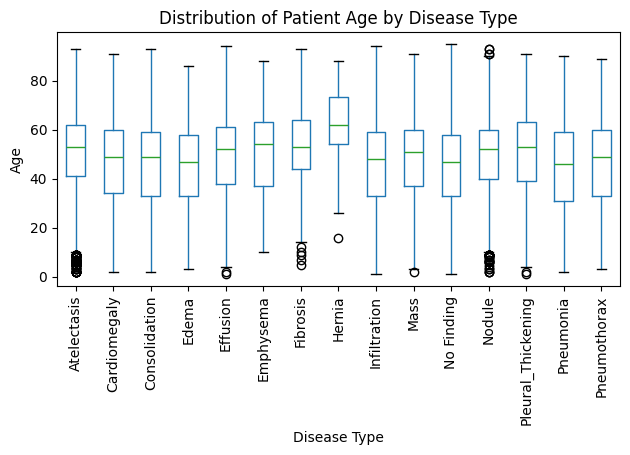

In [ ]:

# Distribution of patient ages by disease type after removing x-rays labeled as older than 100 years old

plt.figure(figsize=(10,6))

df_no_old.boxplot(column="Patient Age", by = "Finding Labels", rot = 90, grid = False)

plt.title("Distribution of Patient Age by Disease Type")
plt.suptitle("")
plt.ylabel("Age")
plt.xlabel("Disease Type")
plt.tight_layout()
plt.show()

In [ ]:

df_no_old.groupby('Finding Labels')['Patient Gender'].describe()


,count,unique,top,freq
Finding Labels,,,,
Atelectasis,11558,2,M,6905
Cardiomegaly,2776,2,F,1469
Consolidation,4667,2,M,2666
Edema,2302,2,M,1203
Effusion,13316,2,M,7434
Emphysema,2516,2,M,1610
Fibrosis,1686,2,M,915
Hernia,227,2,F,131
Infiltration,19891,2,M,11425


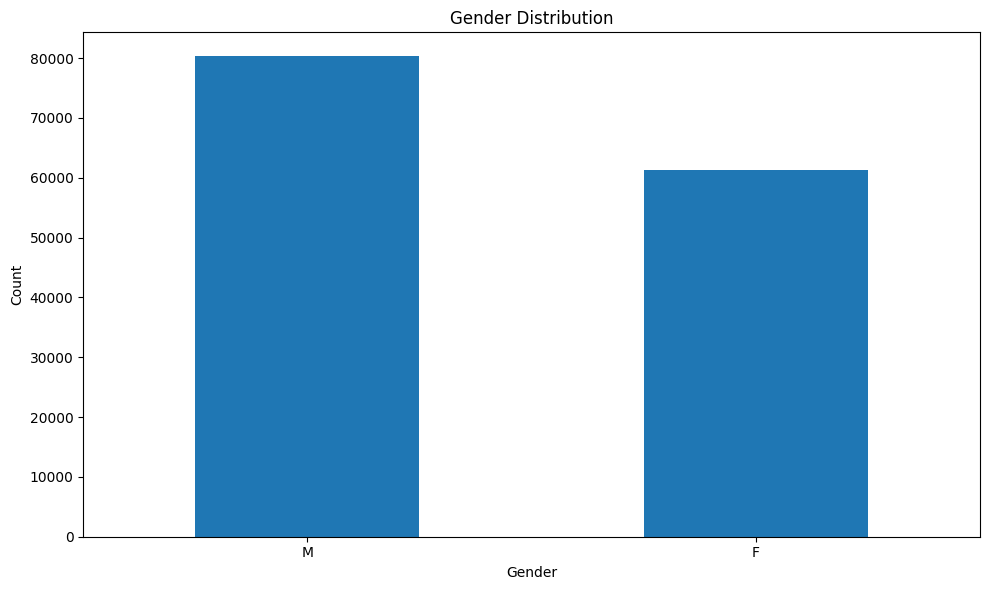

In [ ]:
# Number of male vs female patients
genderCounts = df_no_old.value_counts("Patient Gender")

# bargraph showing frequency of male and female patients
plt.figure(figsize=(10,6))

genderCounts.plot(kind = "bar")

plt.title("Gender Distribution")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.xticks(rotation = 0, ha = "center")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

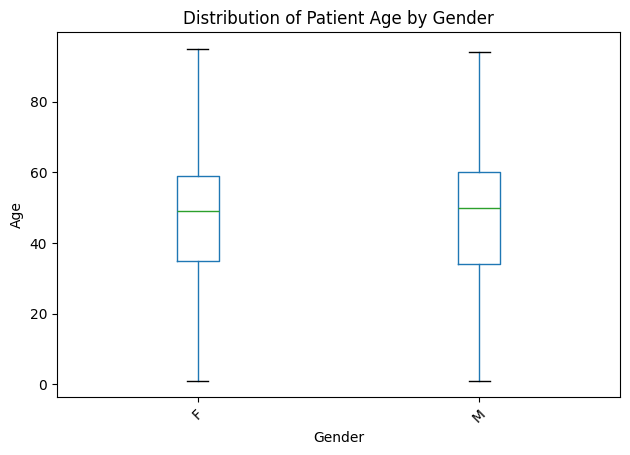

In [ ]:
# Distribution of patient ages by gender after removing x-rays labeled as older than 100 years old

plt.figure(figsize=(10,6))

df_no_old.boxplot(column="Patient Age", by = "Patient Gender", rot = 45, grid = False)

plt.title("Distribution of Patient Age by Gender")
plt.suptitle("")
plt.ylabel("Age")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()

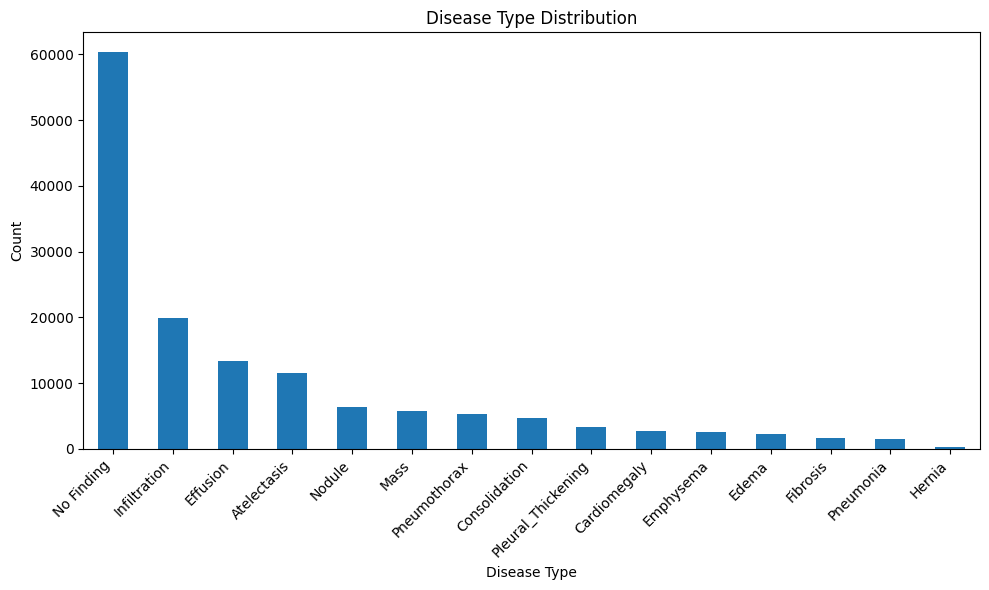

In [ ]:
# Bar graph of disease frequency after splitting multi-labels and removing impossibly old patients

plt.figure(figsize=(10,6))

no_old_counts = df_no_old.value_counts("Finding Labels")

no_old_counts.plot(kind = "bar")

plt.title("Disease Type Distribution")
plt.ylabel("Count")
plt.xlabel("Disease Type")
plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.show()